# Problem Set 4

Wisconsin Breast Cancer Dataset.

You will work with Wisconsin Breast Cancer Dataset (WBCD), available at UCI Machine Learning Repository.You can download it from the internet but rather use the les wdbc.csv.bz2 and wdbc_doc.txt from canvas (under les/data) where I have added the variable names to the data. The rst le is the csv with variable names, the second one a brief description of the data.

The data includes diagnosis of the tumor with M meaning cancer (malignant) and B no cancer(benign), and 10 features, describing physical properties of cell nuclei from biopsy samples. Each feature is represented three times, once for mean, once for standard error, and once for the worst values. Your task is to predict diagnosis based on this data.

## Part 1: Explore the data

As the first step, explore the data.
1. Load the data. You may drop id or just ignore it in the rest of your analysis.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy
from scipy import stats
from scipy.stats.stats import pearsonr   
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,  precision_score, recall_score
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB



#Q 1.1 Load the data
wis = pd.read_csv("/Users/nandy/Downloads/wdbc.csv")
wis=wis.drop('id',axis=1)
print(wis.head(3))
list(wis)

print("Unique values in Diagnosis variable:",wis.diagnosis.unique())
wis['diagnosis1']=(wis.diagnosis=='M')*1
del wis['diagnosis']

  diagnosis  radius.mean  texture.mean  perimeter.mean  area.mean  \
0         M        17.99         10.38           122.8     1001.0   
1         M        20.57         17.77           132.9     1326.0   
2         M        19.69         21.25           130.0     1203.0   

   smoothness.mean  compactness.mean  concavity.mean  concpoints.mean  \
0          0.11840           0.27760          0.3001          0.14710   
1          0.08474           0.07864          0.0869          0.07017   
2          0.10960           0.15990          0.1974          0.12790   

   symmetry.mean      ...        radius.worst  texture.worst  perimeter.worst  \
0         0.2419      ...               25.38          17.33            184.6   
1         0.1812      ...               24.99          23.41            158.8   
2         0.2069      ...               23.57          25.53            152.5   

   area.worst  smoothness.worst  compactness.worst  concavity.worst  \
0      2019.0            0.1622   

Create a summary table where you show means, ranges, and number of missings for each variable.
In addition, add correlation between the diagnosis and the corresponding feature. You may include
more statistics you consider useful.

In [29]:
#Q 1.2 Creating the mean, ranges, missing values & corrletion by variables
z=list(wis)
y=pd.DataFrame({'Mean':wis[z].mean(),
                'Missing':wis[z].isnull().sum(),
                'Range-Min':wis[z].min(),
                'Range-Max':wis[z].max(),
               })
y['corr1']=0
for i in range(0,len(z)):
    x1=pearsonr(wis['diagnosis1'],wis[z[i]])
    y.ix[i,'corr1']= x1[0]

print(y)


                         Mean  Missing   Range-Max   Range-Min     corr1
radius.mean         14.127292        0    28.11000    6.981000  0.730029
texture.mean        19.289649        0    39.28000    9.710000  0.415185
perimeter.mean      91.969033        0   188.50000   43.790000  0.742636
area.mean          654.889104        0  2501.00000  143.500000  0.708984
smoothness.mean      0.096360        0     0.16340    0.052630  0.358560
compactness.mean     0.104341        0     0.34540    0.019380  0.596534
concavity.mean       0.088799        0     0.42680    0.000000  0.696360
concpoints.mean      0.048919        0     0.20120    0.000000  0.776614
symmetry.mean        0.181162        0     0.30400    0.106000  0.330499
fracdim.mean         0.062798        0     0.09744    0.049960 -0.012838
radius.se            0.405172        0     2.87300    0.111500  0.567134
texture.se           1.216853        0     4.88500    0.360200 -0.008303
perimeter.se         2.866059        0    21.98000 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


Many '.worst' variables seem to have higher correlation with the Diagnosis variable. Diagnosis1 variable(numerical) is created from diagnosis variable

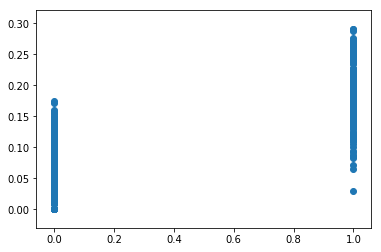

In [30]:
#Q1.3
plt.scatter(wis['diagnosis1'],wis['concpoints.worst'])

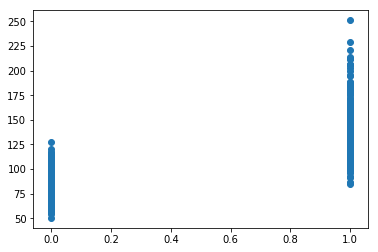

In [31]:
plt.scatter(wis['diagnosis1'],wis['perimeter.worst'])

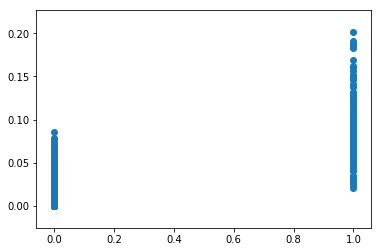

In [32]:
plt.scatter(wis['diagnosis1'],wis['concpoints.mean'])

I have chosen few variables with high correlation to Diagnosis1 variable. The graphical distributions look very intuitive to help separate Malignant & Benign cases.

2 Decision Boundary

The first task is to plot the decision boundary by kNN and by logistic regression. You will also play a little with feature engineering. If you are uncertain what is decision boundary, I recommend to consult James et al. (2015) book
Section 2. For instance, Figure 2.13 on p38 depicts a 2D classification case where certain X1, X2 values are
classified as orange and others as blue. Decision boundary is the dashed winding line that separates these
two regions.

There are two broad strategies to plot it. In any case, you have first to estimate (train) your model. Thereafter you have to predict the classes (cancer/no cancer here) on a regular dense grid that covers the parameter space (this is the small blue/orange dots on gure 2.13). Afterwards you can either plot your predicted values with a certain color code, or alternatively, say, set predicted M = 1 and predicted B = 0, and make a contour plot for a single contour at level 0.5. You may also combine these both methods. We ignore training/testing/overfitting issues for now.

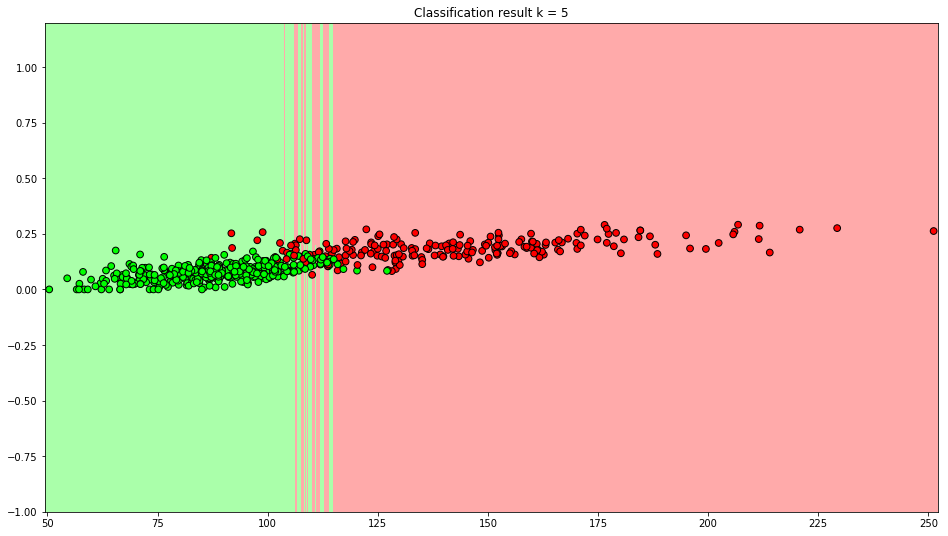

Accuracy: 0.9349736379613357


In [37]:
#Q 2.1 Build KNN model
n = 5
p = 1

#Fit the KNN model
X = pd.DataFrame(wis['perimeter.worst'])
X['concpoints.worst']=wis['concpoints.worst']
y=wis['diagnosis1']
wis_clf = KNeighborsClassifier(n_neighbors=n,p=p)
wis_clf.fit(X, y)


#Plotting decision regions
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
cmap_light = ListedColormap([ '#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap([ '#00FF00','#FF0000'])
Z = wis_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,            edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classification result k = %i"          % (n))
plt.show()

#Find Accuracy of prediction
wis_preds = wis_clf.predict(X)
print("Accuracy:",accuracy_score(wis_preds,wis.diagnosis1))

This KNN model was built without scaling of the variables. Hence built a model after scaling below:

Accuracy: 0.9472759226713533


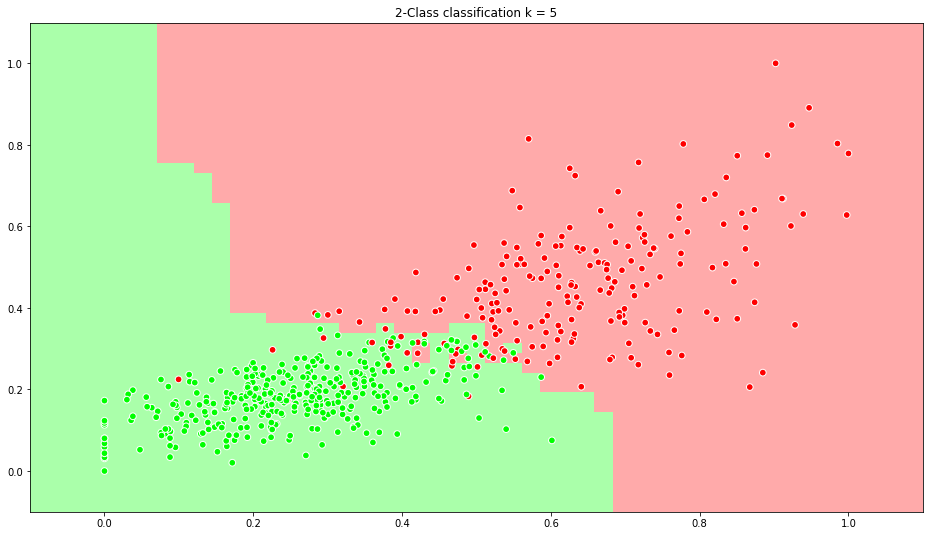

In [38]:
#Q 2.1
#Build KNN model
n = 5
p = 1

scaler = MinMaxScaler()
scaler.fit(wis)
scaled_wis_data = pd.DataFrame(scaler.transform(wis),columns=list(wis))
X = pd.DataFrame(scaled_wis_data['concpoints.worst'])
X['perimeter.worst']=scaled_wis_data['perimeter.worst']
y=scaled_wis_data['diagnosis1']
wis_clf = KNeighborsClassifier(n_neighbors=n,p=p)
wis_clf.fit(X, y)

# Plotting decision regions
dx = X.iloc[:, 0].max() - X.iloc[:, 0].min()
dy = X.iloc[:, 1].max() - X.iloc[:, 1].min()
x_min, x_max = X.iloc[:, 0].min() - 0.1*dx, X.iloc[:, 0].max() + 0.1*dx
y_min, y_max = X.iloc[:, 1].min() - 0.1*dy, X.iloc[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = wis_clf.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification k = %i" % (n))

wis_preds = wis_clf.predict(X)
print("Accuracy:",accuracy_score(wis_preds,wis.diagnosis1))

KNN model plot looks good interms of the ability to distinguish the classes. It is also able to pick up small segments such at point (.42,3), where there is a red box within the green area to capture the red dots. We can also see increased accuracy when we scaled the variables. 

But this might be of concern, as it might be overfitting for the training dataset & test data might not have many red dots at (.42,3) which would decrease the accuracy.

2.2 Logistic Regression

Now repeat the process above by logistic regression. Pick the same features as what you used for k-NN
above.

1. Fit a logistic regression model with these two features.
2. Predict the diagnosis on a similar grid. . .
3. . . . and create a similar plot.
4. Describe your observations. How does the result for kNN compare to that for Logistic Regression?

Accuracy: 0.9191564147627417


Text(0.5,1,'Logistic regression split: y = X1 +X2')

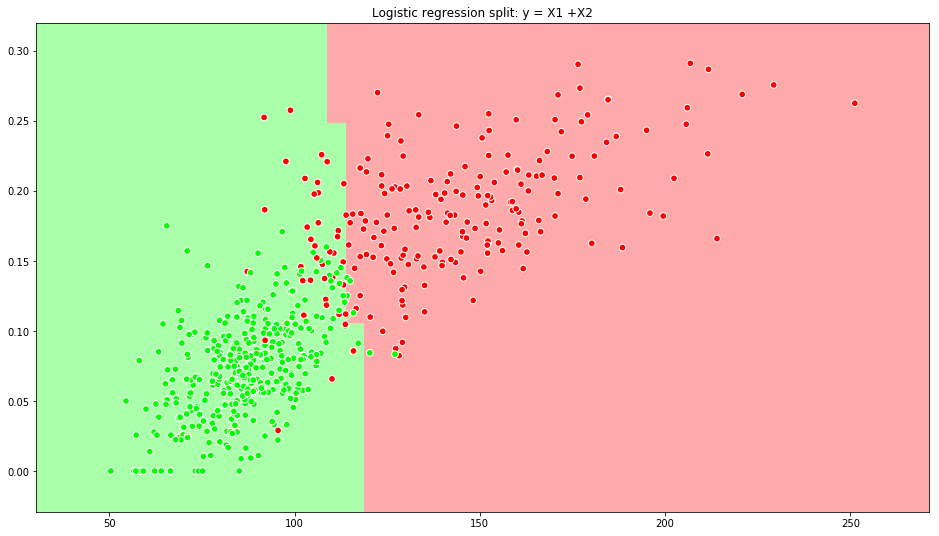

In [39]:
#print(wis.head())
X = pd.DataFrame()
X['perimeter_worst']=wis['perimeter.worst']
X['concpoints_worst']=wis['concpoints.worst']
y=wis['diagnosis1']

mlog = LogisticRegression().fit(X, y)
wis_preds = mlog.predict(X)
print("Accuracy:",accuracy_score(wis_preds,y))

# Plotting decision regions
dx = X.iloc[:, 0].max() - X.iloc[:, 0].min()
dy = X.iloc[:, 1].max() - X.iloc[:, 1].min()
x_min, x_max = X.iloc[:, 0].min() - 0.1*dx, X.iloc[:, 0].max() + 0.1*dx
y_min, y_max = X.iloc[:, 1].min() - 0.1*dy, X.iloc[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = mlog.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression split: y = X1 +X2")


Logistic regression has lower accuracy when compared to KNN - may be because the model does not have flexibility to capture red areas within green areas like KNN. Even by looking at the plot, many red dots seem to have been misclassified.

2.3 Feature Engineering

So far you were using just two of the existing features in the data. However, now let's create a few more.
1. Use these two features to compute some new ones. Let's denote your original features by x and y.
Examples you may create include: x2, y2, x·y, 1(x > 5), 1(y < 1)·x2, log x . . . You can use all sorts of
mathematical operations as long as a) you only use x and y, not other features, and b) the original
and the engineered features remain linearly independent (they are, unless you create features like
α · x + β · y).
2. Fit a logistic regression model. However, this time pick both x, y, and some of your engineered
features.
3. Create the decision boundary plot.
4. Comment on the shape of the boundary. What do you think, how well can you capture the actual
boundary? What about overfitting? (Again, I ask about your judgement, not about any formal
analysis).
5. Repeat the exercise a few times where you pick/engineer different new features, and try to get as
reasonable boundary as you can.
As above, I am asking for reasonable boundary in the sense of your best judgement. No actual cross
validation is necessary.
Note: I have mixed experience with scikit-learn.linear_model.LogisticRegression. It occasionally
appears the default convergence tolerance is far too big, and the default liblinear solver too imprecise.
Setting tolerance to 10−12 and solver to lbfgs improved the results for me, but did not make it flawless.

Accuracy: 0.9191564147627417


Text(0.5,1,'Logistic regression split: y = (X1)^2 +X2')

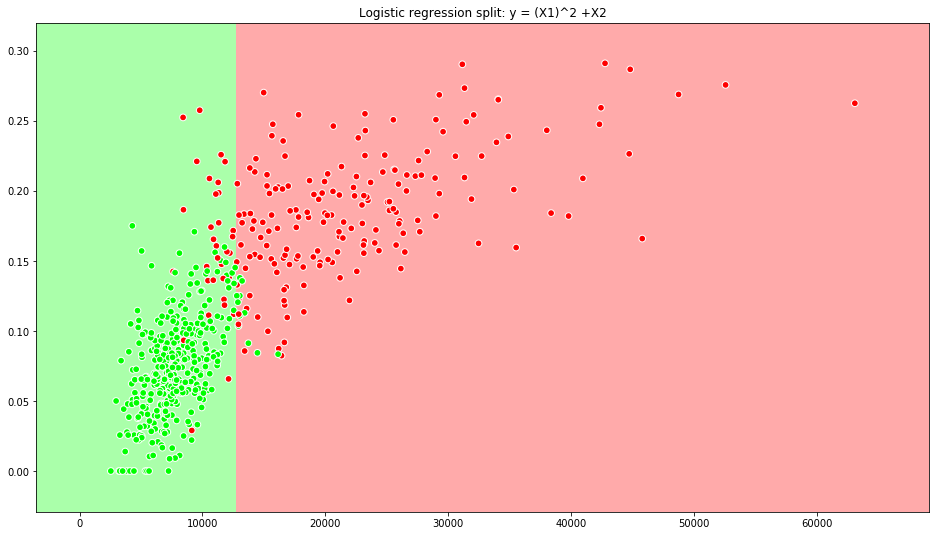

In [40]:
X = pd.DataFrame()
X['perimeter_worst']=wis['perimeter.worst']**2
X['concpoints_worst']=wis['concpoints.worst']
y=wis['diagnosis1']
mlog = LogisticRegression().fit(X, y)
wis_preds = mlog.predict(X)
print("Accuracy:",accuracy_score(wis_preds,y))

# Plotting decision regions
dx = X.iloc[:, 0].max() - X.iloc[:, 0].min()
dy = X.iloc[:, 1].max() - X.iloc[:, 1].min()
x_min, x_max = X.iloc[:, 0].min() - 0.1*dx, X.iloc[:, 0].max() + 0.1*dx
y_min, y_max = X.iloc[:, 1].min() - 0.1*dy, X.iloc[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = mlog.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression split: y = (X1)^2 +X2")


The accuracy is similar to what was observed in X1+X2. Looking at the accuracy & the plot, this model is not any better than the previous model

Accuracy: 0.9191564147627417


Text(0.5,1,'Logistic regression split: y = X1 +X2^2')

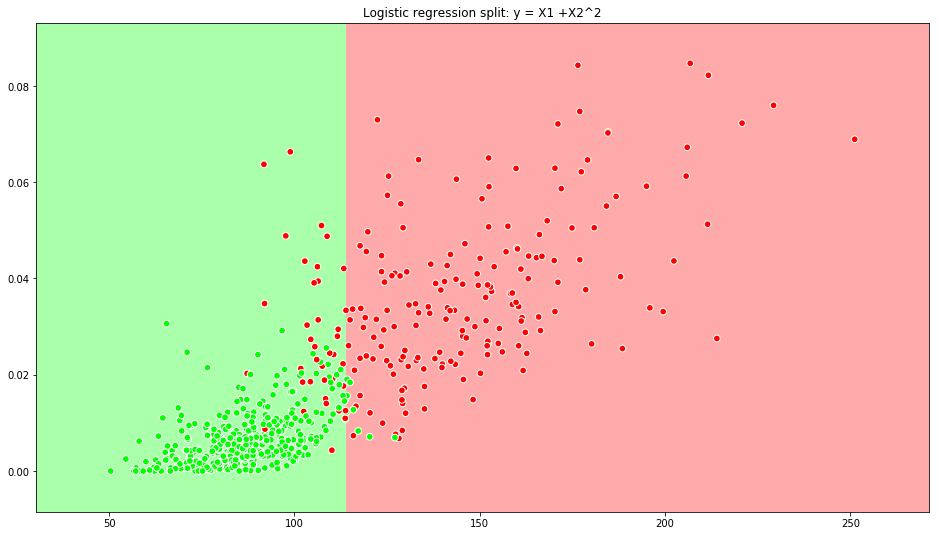

In [41]:
X = pd.DataFrame()
X['perimeter_worst']=wis['perimeter.worst']
X['concpoints_worst']=wis['concpoints.worst']**2
y=wis['diagnosis1']
mlog = LogisticRegression().fit(X, y)
wis_preds = mlog.predict(X)
print("Accuracy:",accuracy_score(wis_preds,y))

# Plotting decision regions
dx = X.iloc[:, 0].max() - X.iloc[:, 0].min()
dy = X.iloc[:, 1].max() - X.iloc[:, 1].min()
x_min, x_max = X.iloc[:, 0].min() - 0.1*dx, X.iloc[:, 0].max() + 0.1*dx
y_min, y_max = X.iloc[:, 1].min() - 0.1*dy, X.iloc[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = mlog.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression split: y = X1 +X2^2")


Same as y=(x1)^2+x2, even y=x1+x2^2 is very similar to y=x1+x2. The misclassification of red is still high and accuracy has not improved as well.

Accuracy: 0.48857644991212656


Text(0.5,1,'Logistic regression split: y = X1 +X2*X1')

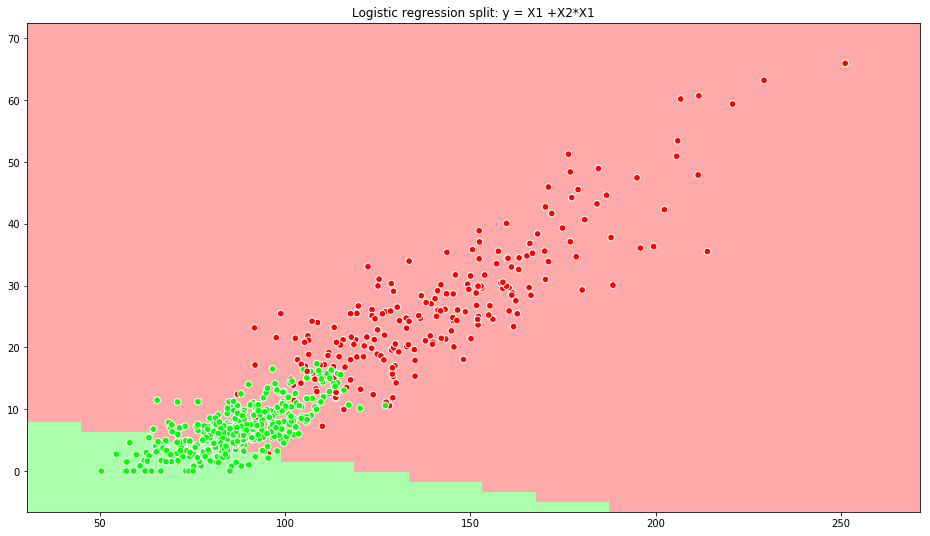

In [42]:
X = pd.DataFrame()
X['perimeter_worst']=wis['perimeter.worst']
X['xy']=wis['concpoints.worst']*wis['perimeter.worst']
y=wis['diagnosis1']
wis_preds = mlog.predict(X)
print("Accuracy:",accuracy_score(wis_preds,y))

# Plotting decision regions
dx = X.iloc[:, 0].max() - X.iloc[:, 0].min()
dy = X.iloc[:, 1].max() - X.iloc[:, 1].min()
x_min, x_max = X.iloc[:, 0].min() - 0.1*dx, X.iloc[:, 0].max() + 0.1*dx
y_min, y_max = X.iloc[:, 1].min() - 0.1*dy, X.iloc[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = mlog.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression split: y = X1 +X2*X1")


This is the worst model so far. Many benign(green points) are misclassified. Accuracy is less than 50% too

Accuracy: 0.9420035149384886


Text(0.5,1,'Logistic regression split: y = X1>120 +X2>.15')

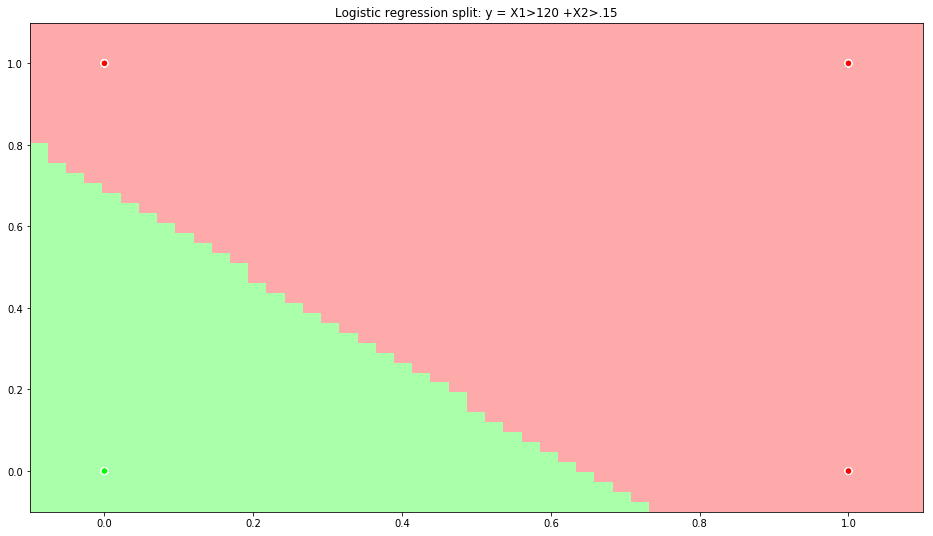

In [43]:
X = pd.DataFrame()
X['perimeter_worst']=(wis['perimeter.worst']>120)*1
X['concpoints_worst']=(wis['concpoints.worst']>.15)*1
y=wis['diagnosis1']
mlog = LogisticRegression().fit(X, y)
wis_preds = mlog.predict(X)
print("Accuracy:",accuracy_score(wis_preds,y))

# Plotting decision regions
dx = X.iloc[:, 0].max() - X.iloc[:, 0].min()
dy = X.iloc[:, 1].max() - X.iloc[:, 1].min()
x_min, x_max = X.iloc[:, 0].min() - 0.1*dx, X.iloc[:, 0].max() + 0.1*dx
y_min, y_max = X.iloc[:, 1].min() - 0.1*dy, X.iloc[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = mlog.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression split: y = X1>120 +X2>.15")

In this model, as both X1 & X2 are converted to dummy variables, we have only 4 posibilities((0,0),(0,1),(1,0),(1,1)). Though accuracy is better, I am not sure whether I will call this a useful model. Need to look at precision & recall to make a better decision

Accuracy: 0.9402460456942003


Text(0.5,1,'Logistic regression split: y = X1 +X2>.15')

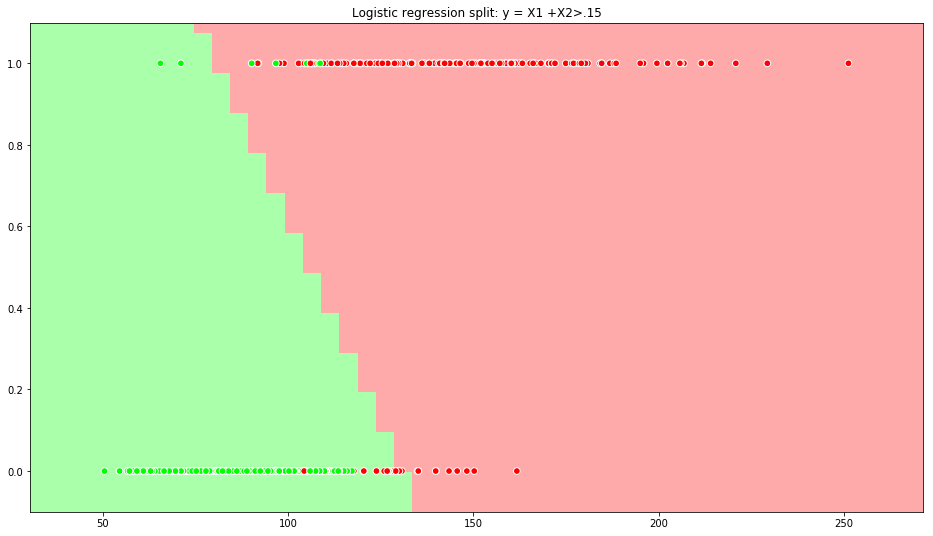

In [44]:
X = pd.DataFrame()
X['perimeter_worst']=wis['perimeter.worst']
X['concpoints_worst']=(wis['concpoints.worst']>.15)*1
y=wis['diagnosis1']
mlog = LogisticRegression().fit(X, y)
wis_preds = mlog.predict(X)
print("Accuracy:",accuracy_score(wis_preds,y))

# Plotting decision regions
dx = X.iloc[:, 0].max() - X.iloc[:, 0].min()
dy = X.iloc[:, 1].max() - X.iloc[:, 1].min()
x_min, x_max = X.iloc[:, 0].min() - 0.1*dx, X.iloc[:, 0].max() + 0.1*dx
y_min, y_max = X.iloc[:, 1].min() - 0.1*dy, X.iloc[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = mlog.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression split: y = X1 +X2>.15")

This model is the best logistic model so far. The accuracy has increased, and even in terms of interpretation, it is better.

Accuracy: 0.9191564147627417


Text(0.5,1,'Logistic regression split: y = X3 +X2')

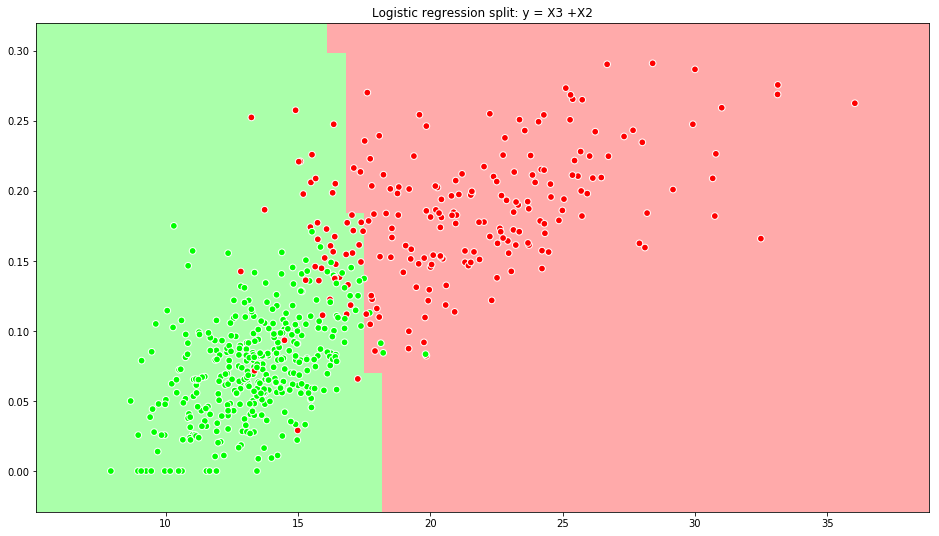

In [45]:
X = pd.DataFrame()
X['radius_worst']=wis['radius.worst']
X['concpoints_worst']=wis['concpoints.worst']
y=wis['diagnosis1']
mlog = LogisticRegression().fit(X, y)
wis_preds = mlog.predict(X)
print("Accuracy:",accuracy_score(wis_preds,y))

# Plotting decision regions
dx = X.iloc[:, 0].max() - X.iloc[:, 0].min()
dy = X.iloc[:, 1].max() - X.iloc[:, 1].min()
x_min, x_max = X.iloc[:, 0].min() - 0.1*dx, X.iloc[:, 0].max() + 0.1*dx
y_min, y_max = X.iloc[:, 1].min() - 0.1*dy, X.iloc[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = mlog.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression split: y = X3 +X2")

Used radius.worst instead of perimeter.worst variable. This model is not better than previous model. But overall I feel atleast for this dataset, KNN performed better in the first try with same variables.

Accuracy: 0.9384885764499121


Text(0.5,1,'Logistic regression split: y = X3 +X2>.15')

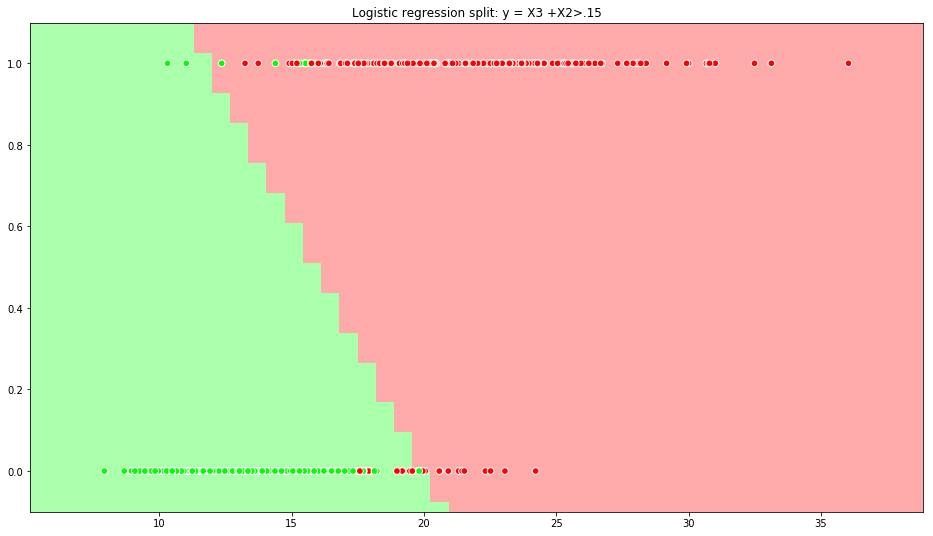

In [46]:
X = pd.DataFrame()
X['radius_worst']=wis['radius.worst']
X['concpoints_worst']=(wis['concpoints.worst']>.15)*1
y=wis['diagnosis1']
mlog = LogisticRegression().fit(X, y)


#Accuracy of logistic model

wis_preds = mlog.predict(X)
print("Accuracy:",accuracy_score(wis_preds,y))

# Plotting decision regions
dx = X.iloc[:, 0].max() - X.iloc[:, 0].min()
dy = X.iloc[:, 1].max() - X.iloc[:, 1].min()
x_min, x_max = X.iloc[:, 0].min() - 0.1*dx, X.iloc[:, 0].max() + 0.1*dx
y_min, y_max = X.iloc[:, 1].min() - 0.1*dy, X.iloc[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = mlog.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression split: y = X3 +X2>.15")

Used radius.worst, but still perimeter.worst variable worked better. The best model for logistic regression is y = perimeter.worst + (concpoints.worst>.15).

3 Use the full data

Finally, we'll get serious. We'll use full data set in the logistic regression, include regularization, and
cross-validate our results.

3.1 Cross Validation

Here your task is to Write code to do n-fold cross validation. Note: I expect you to implement CV here, not to use any canned version. Consult James et al. (2015, Section 5.1.3).

1. You should do k-fold CV (k >= 10) with the following tasks:
(a) Fit logistic regression model on training data using all existing features. You may also add your engineered features if you wish.
(b) Calculate accuracy, precision and recall on the validation data.
2. Report the average accuracy, precision, and recall over your CV runs

In [47]:
k = 10
indices = np.arange(len(wis))
np.random.shuffle(indices)

In [48]:
rmse1 = np.empty(k)
accuracy1 = np.empty(k)
precision1 = np.empty(k)
recall1 = np.empty(k)
wis['perimeter_worst']=wis['perimeter.worst']
wis['concpoints_worst']=wis['concpoints.worst']
X = pd.DataFrame()
xcol=['radius.mean', 'texture.mean', 'perimeter.mean', 'area.mean', 'smoothness.mean', 'compactness.mean', 'concavity.mean', 'concpoints.mean', 'symmetry.mean', 'fracdim.mean', 'radius.se', 'texture.se', 'perimeter.se', 'area.se', 'smoothness.se', 'compactness.se', 'concavity.se', 'concpoints.se', 'symmetry.se', 'fracdim.se', 'radius.worst', 'texture.worst', 'perimeter.worst', 'area.worst', 'smoothness.worst', 'compactness.worst', 'concavity.worst', 'concpoints.worst', 'symmetry.worst', 'fracdim.worst', 'perimeter_worst', 'concpoints_worst']
for i in range(k):
    itest = indices[i::k]
    itrain = list(set(indices).difference(itest))
    testDat = wis.iloc[itest]
    trainDat = wis.iloc[itrain]
    X=trainDat[xcol]
    y=trainDat['diagnosis1']
    mlog = LogisticRegression(penalty='l1', C=1).fit(X, y)    
    X1=testDat[xcol]
    y1=testDat['diagnosis1']
    yhat1 = mlog.predict(X1)
    rmse1[i] = np.sqrt(np.mean((yhat1 - y1)**2))
    accuracy1[i]=accuracy_score(yhat1,y1)
    precision1[i] = precision_score(yhat1, y1, average="macro")
    recall1[i] = recall_score(yhat1, y1, average="macro")
    

print("RMSE:",np.mean(rmse1))
print("Accuracy:",np.mean(accuracy1))
print("Precision:",np.mean(precision1))
print("Recall:",np.mean(recall1))



RMSE: 0.21258410791516336
Accuracy: 0.950689223057644
Precision: 0.9444773799185564
Recall: 0.9522333522377548


With all the variables, the Accuracy has increased to 95% when compared to just 2 variables in the previous logistic regression.

3.2 Regularization
Your (almost) last task is to find the best regularization parameter using CV algorithm you created above.
Consult James et al. (2015, Section 6.2) for introduction to regularization methods (ridge and lasso). I
expect you to play with regularization parameters in existing software, such as scikit-learn.linear_model,
not to implement it yourself.

1. Pick a type of regularization (lasso, ridge, elastic net).
2. Create a wide list of regularization parameters. And I mean wide, for instance ranging from 10-6 to
106. Pick a number of values for lamda inside this range.
3. For each lambda in this range, repeat the CV process in exercise 3.1 above. Compute accuracy, precision,
recall.

Warning: this may be slow, so I recommend you to start with only a few values. When you algorithm
works well, increase the number of values.

4. Report the results as a function of lambda. This may be in the form of a table or a graph.
5. Report the best regularization parameters, and the best results.

In [17]:
i=0
k=10
j=0
result=pd.DataFrame()
rng=[.000001,.00001,.001,.1,1,10,1000,10000,100000]

#pick ridge regularization
for j in range(0,9):
    for i in range(k):
        itest = indices[i::k]
        itrain = list(set(indices).difference(itest))
        testDat = wis.iloc[itest]
        trainDat = wis.iloc[itrain]
        X=trainDat[xcol]
        y=trainDat['diagnosis1']
        mlog = LogisticRegression(penalty='l2', C=1/rng[j]).fit(X, y)    
        X1=testDat[xcol]
        y1=testDat['diagnosis1']
        yhat1 = mlog.predict(X1)
        rmse1[i] = np.sqrt(np.mean((yhat1 - y1)**2))
        accuracy1[i]=accuracy_score(yhat1,y1)
        precision1[i] = precision_score(yhat1, y1, average="macro")
        recall1[i] = recall_score(yhat1, y1, average="macro")
    result.loc[j,'penalty_type']= "Ridge"
    result.loc[j,'C']= rng[j]
    result.loc[j,'RMSE']= np.mean(rmse1)
    result.loc[j,'accuracy']= np.mean(accuracy1)
    result.loc[j,'precision']= np.mean(precision1)
    result.loc[j,'recall']= np.mean(recall1)

print(result)

  penalty_type              C      RMSE  accuracy  precision    recall
0        Ridge       0.000001  0.178793  0.957738   0.953494  0.955995
1        Ridge       0.000010  0.176434  0.957738   0.953224  0.956635
2        Ridge       0.001000  0.184350  0.954198   0.950444  0.951895
3        Ridge       0.100000  0.174462  0.959555   0.957348  0.957572
4        Ridge       1.000000  0.198594  0.952538   0.947893  0.951402
5        Ridge      10.000000  0.224362  0.945520   0.940407  0.943407
6        Ridge    1000.000000  0.274407  0.920865   0.908483  0.926323
7        Ridge   10000.000000  0.277704  0.919142   0.904798  0.927027
8        Ridge  100000.000000  0.284306  0.915664   0.893225  0.931160


Accuracy, precision & recall is maximum with lambda=.1

4 ROC curve: which estimator is the best

Your last task is to create the ROC curve of several estimators. Consult James et al. (2015, p 148) for what
is the ROC curve. You have to compare a) k-NN, b) Naive Bayes, and c) logistic regression estimators.
In case of k-NN, you should pick a few different k values (say, 1, 5 and 25). In case of Naive Bayes, you
may use use sklearn.naive_bayes.GaussianNB. Feel free to use it as is, no calibration necessary.
1. Split your data into testing and training sets (you may use sklearn.model_selection.train_test_split),
say 1/3 for testing. Use all the features in the original data.
2. Using your training data, estimate (a few) k-NN models, Naive Bayes model, and logistic regression.
Notes: in case of k-NN, you should use scaled features. In case of logistic regression, use the optimal
regularization parameter value you found in 3.2.
3. For each of the models, predict the probabilites on the test data.
Note: you have to use predict_proba, not predict for logistic and NB regression.
4. Pick a number of thresholds between 0 and 1 (for instance, 0, 0.1, 0.2, ...). For each model and each
threshold, treat your predictions to be 1 if it it's probability is at least as big as the threshold.
5. Based on these predictions, compute false positive rate and true positive rate.
6. Plot these rates for each threshold and model.
7. Comment your results. Which model is the best?

In [74]:
result1=pd.DataFrame()
xcol=['radius.mean', 'texture.mean', 'perimeter.mean', 'area.mean', 'smoothness.mean', 'compactness.mean', 'concavity.mean', 'concpoints.mean', 'symmetry.mean', 'fracdim.mean', 'radius.se', 'texture.se', 'perimeter.se', 'area.se', 'smoothness.se', 'compactness.se', 'concavity.se', 'concpoints.se', 'symmetry.se', 'fracdim.se', 'radius.worst', 'texture.worst', 'perimeter.worst', 'area.worst', 'smoothness.worst', 'compactness.worst', 'concavity.worst', 'concpoints.worst', 'symmetry.worst', 'fracdim.worst']
xcol2=['radius.mean', 'perimeter.mean', 'area.mean', 'compactness.mean', 'concavity.mean', 'concpoints.mean','radius.se',  'perimeter.se', 'area.se',  'radius.worst',  'perimeter.worst', 'area.worst',  'compactness.worst', 'concavity.worst', 'concpoints.worst']

X=wis[xcol]
y=wis['diagnosis1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=26)

#Logistic Model
mlog = LogisticRegression(penalty='l2', C=1/.1).fit(X, y)    
X1=X_test[xcol]
y1=y_test
yhat1 = mlog.predict(X1)
rmse1 = np.sqrt(np.mean((yhat1 - y1)**2))
accuracy1=accuracy_score(yhat1,y1)
precision1 = precision_score(yhat1, y1, average="macro")
recall1 = recall_score(yhat1, y1, average="macro")
result1.loc[0,'Model_type']= "Logistic"
result1.loc[0,'Comments']= "All X variables"
result1.loc[0,'RMSE']= rmse1
result1.loc[0,'accuracy']= accuracy1
result1.loc[0,'precision']= precision1
result1.loc[0,'recall']= recall1


#KNN
#Scaling the data
scaler = MinMaxScaler()
scaler.fit(wis)
scaled_wis_data = pd.DataFrame(scaler.transform(wis),columns=list(wis))

n = 5
p = 1

X=scaled_wis_data[xcol]
y=scaled_wis_data['diagnosis1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=25)

wis_clf = KNeighborsClassifier(n_neighbors=n,p=p)
wis_clf.fit(X_train, y_train)

X1=X_test[xcol]
y1=y_test
yhat1 =wis_clf.predict(X1)
rmse1 = np.sqrt(np.mean((yhat1 - y1)**2))
accuracy1=accuracy_score(yhat1,y1)
precision1 = precision_score(yhat1, y1, average="macro")
recall1 = recall_score(yhat1, y1, average="macro")
result1.loc[1,'Model_type']= "KNN"
result1.loc[1,'Comments']= "All X variables"
result1.loc[1,'RMSE']= rmse1
result1.loc[1,'accuracy']= accuracy1
result1.loc[1,'precision']= precision1
result1.loc[1,'recall']= recall1


#Logistic Model with only selected X variables
X=wis[xcol2]
y=wis['diagnosis1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=29)

mlog = LogisticRegression(penalty='l2', C=1/.1).fit(X, y)    
X1=X_test[xcol2]
y1=y_test
yhat1 = mlog.predict(X1)
rmse1 = np.sqrt(np.mean((yhat1 - y1)**2))
accuracy1=accuracy_score(yhat1,y1)
precision1 = precision_score(yhat1, y1, average="macro")
recall1 = recall_score(yhat1, y1, average="macro")
result1.loc[5,'Model_type']= "Logistic"
result1.loc[5,'Comments']= "Only X with corr>.5"
result1.loc[5,'RMSE']= rmse1
result1.loc[5,'accuracy']= accuracy1
result1.loc[5,'precision']= precision1
result1.loc[5,'recall']= recall1


#Naive bayes
xcol=['radius.mean', 'texture.mean', 'perimeter.mean', 'area.mean', 'smoothness.mean', 'compactness.mean', 'concavity.mean', 'concpoints.mean', 'symmetry.mean', 'fracdim.mean', 'radius.se', 'texture.se', 'perimeter.se', 'area.se', 'smoothness.se', 'compactness.se', 'concavity.se', 'concpoints.se', 'symmetry.se', 'fracdim.se', 'radius.worst', 'texture.worst', 'perimeter.worst', 'area.worst', 'smoothness.worst', 'compactness.worst', 'concavity.worst', 'concpoints.worst', 'symmetry.worst', 'fracdim.worst']
X=wis[xcol]
y=wis['diagnosis1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=28)


gnb = GaussianNB()
y_hat1 = gnb.fit(X_train, y_train).predict(X_test)
#print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0],(y_test != y_pred).sum()))
y1=y_test

rmse1 = np.sqrt(np.mean((yhat1 - y1)**2))
accuracy1=accuracy_score(yhat1,y1)
precision1 = precision_score(yhat1, y1, average="macro")
recall1 = recall_score(yhat1, y1, average="macro")
result1.loc[2,'Model_type']= "Naive Bayes"
result1.loc[2,'Comments']= "All X variables"
result1.loc[2,'RMSE']= rmse1
result1.loc[2,'accuracy']= accuracy1
result1.loc[2,'precision']= precision1
result1.loc[2,'recall']= recall1

#KNN with only selected X variables
scaler = MinMaxScaler()
scaler.fit(wis)
scaled_wis_data = pd.DataFrame(scaler.transform(wis),columns=list(wis))

n = 5
p = 1

X=scaled_wis_data[xcol2]
y=scaled_wis_data['diagnosis1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=26)

wis_clf = KNeighborsClassifier(n_neighbors=n,p=p)
wis_clf.fit(X_train, y_train)

X1=X_test[xcol2]
y1=y_test
yhat1 =wis_clf.predict(X1)
rmse1 = np.sqrt(np.mean((yhat1 - y1)**2))
accuracy1=accuracy_score(yhat1,y1)
precision1 = precision_score(yhat1, y1, average="macro")
recall1 = recall_score(yhat1, y1, average="macro")
result1.loc[4,'Model_type']= "KNN"
result1.loc[4,'Comments']= "Only X with corr>.5"
result1.loc[4,'RMSE']= rmse1
result1.loc[4,'accuracy']= accuracy1
result1.loc[4,'precision']= precision1
result1.loc[4,'recall']= recall1


#Naive Bayes with only selected X variables
X=wis[xcol2]
y=wis['diagnosis1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=27)
yhat= list(gnb.fit(X_train, y_train).predict(X_test))
y1=y_test

rmse2 = np.sqrt(np.mean((yhat - y1)**2))
accuracy2=accuracy_score(yhat,y1)
precision2 = precision_score(yhat, y1, average="macro")
recall2 = recall_score(yhat, y1, average="macro")
result1.loc[3,'Model_type']= "Naive Bayes"
result1.loc[3,'Comments']= "Only X with corr>.5"
result1.loc[3,'RMSE']= rmse2
result1.loc[3,'accuracy']= accuracy2
result1.loc[3,'precision']= precision2
result1.loc[3,'recall']= recall2



print(result1)


    Model_type             Comments      RMSE  accuracy  precision    recall
0     Logistic      All X variables  0.177705  0.968421   0.968379  0.961231
1          KNN      All X variables  0.217643  0.952632   0.936570  0.956243
5     Logistic  Only X with corr>.5  0.191943  0.963158   0.958683  0.964935
2  Naive Bayes      All X variables  0.703375  0.505263   0.468597  0.470061
4          KNN  Only X with corr>.5  0.191943  0.963158   0.964442  0.954057
3  Naive Bayes  Only X with corr>.5  0.280976  0.921053   0.909369  0.922036


The best model is logistic regression with all variables. Since models with all X variables perform better, to calculate the threshold, I will be using only models with all X variables

  Model_type  Cutoff      RMSE  accuracy  precision    recall  true_positive  \
1   Logistic     0.1  0.622171  0.931579   0.948819  0.914474       0.331579   
2   Logistic     0.2  0.595683  0.947368   0.956630  0.932418       0.326316   
3   Logistic     0.3  0.581988  0.963158   0.968441  0.951784       0.326316   
4   Logistic     0.4  0.567962  0.968421   0.972378  0.958622       0.326316   
5   Logistic     0.5  0.567962  0.968421   0.968379  0.961231       0.321053   
6   Logistic     0.6  0.553581  0.973684   0.972316  0.968626       0.321053   
7   Logistic     0.7  0.553581  0.978947   0.976253  0.976253       0.321053   
8   Logistic     0.8  0.538816  0.978947   0.968254  0.984733       0.310526   
9   Logistic     0.9  0.538816  0.957895   0.936508  0.970370       0.289474   

   false_positive  true_negative  false_negative  
1        0.068421       0.600000        0.000000  
2        0.047368       0.621053        0.005263  
3        0.031579       0.636842        0.0052

Text(0.9,0.0684211,'False Negative')

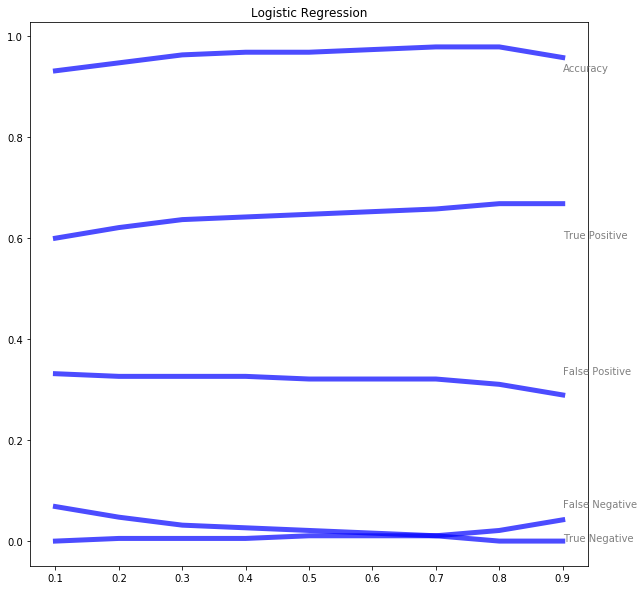

In [119]:
X=wis[xcol]
y=wis['diagnosis1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=26)
result2=pd.DataFrame()

#Logistic Model
mlog = LogisticRegression(penalty='l2', C=1/.1).fit(X, y)    
X1=X_test[xcol]
y1=y_test
yhat2 = pd.DataFrame(mlog.predict_proba(X1))
i=1 
for i in range(1,10): 
    j=i/10
    yhat1=(yhat2.iloc[:,1]> j )*1
    rmse1 = np.sqrt(np.mean((yhat1 - y1)**2))
    accuracy1=accuracy_score(yhat1,y1)
    precision1 = precision_score(yhat1, y1, average="macro")
    recall1 = recall_score(yhat1, y1, average="macro")
    TP = np.sum(np.logical_and(yhat1 == 1, y1 == 1))
    TN = np.sum(np.logical_and(yhat1 == 0, y1 == 0))
    FP = np.sum(np.logical_and(yhat1 == 1, y1 == 0))
    FN = np.sum(np.logical_and(yhat1 == 0, y1 == 1))
    result2.loc[i,'Model_type']= "Logistic"
    result2.loc[i,'Cutoff']= j
    result2.loc[i,'RMSE']= rmse1
    result2.loc[i,'accuracy']= accuracy1
    result2.loc[i,'precision']= precision1
    result2.loc[i,'recall']= recall1
    result2.loc[i,'true_positive']= TP/len(yhat1)
    result2.loc[i,'false_positive']= FP/len(yhat1)
    result2.loc[i,'true_negative']= TN/len(yhat1)
    result2.loc[i,'false_negative']= FN/len(yhat1)

print(result2)

plt.figure(figsize=(10,10))
plt.title('Logistic Regression')

plt.plot(result2['Cutoff'], result2.iloc[:,3],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,3],"Accuracy", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,8],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,8],"True Positive", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,9],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,9],"True Negative", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,6],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,6],"False Positive", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,7],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,7],"False Negative", horizontalalignment='left', size='medium', color='grey')


Accuracy is very high, but the True Negatives are very less, and are misclassifed as False positive

    Model_type  Cutoff      RMSE  accuracy  precision    recall  \
1  Naive Bayes     0.1  0.707107  0.578947   0.546310  0.544609   
2  Naive Bayes     0.2  0.707107  0.573684   0.524560  0.525122   
3  Naive Bayes     0.3  0.707107  0.573684   0.524560  0.525122   
4  Naive Bayes     0.4  0.696932  0.568421   0.509897  0.510580   
5  Naive Bayes     0.5  0.696932  0.568421   0.509897  0.510580   
6  Naive Bayes     0.6  0.696932  0.578947   0.517962  0.519590   
7  Naive Bayes     0.7  0.696932  0.578947   0.517962  0.519590   
8  Naive Bayes     0.8  0.696932  0.589474   0.522483  0.525641   
9  Naive Bayes     0.9  0.696932  0.589474   0.522483  0.525641   

   false_positive  false_negative  true_positive  true_negative  
1        0.226316        0.194737       0.152632       0.426316  
2        0.205263        0.221053       0.126316       0.447368  
3        0.205263        0.221053       0.126316       0.447368  
4        0.194737        0.236842       0.110526       0.457895  

Text(0.9,0.194737,'False Negative')

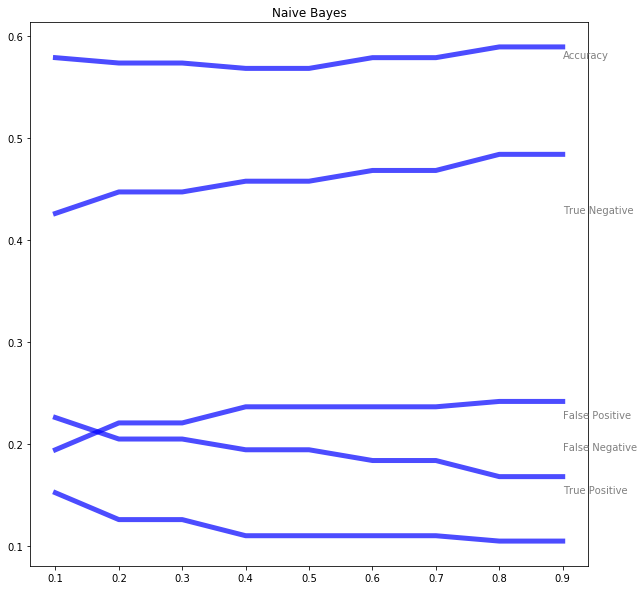

In [118]:
xcol=['radius.mean', 'texture.mean', 'perimeter.mean', 'area.mean', 'smoothness.mean', 'compactness.mean', 'concavity.mean', 'concpoints.mean', 'symmetry.mean', 'fracdim.mean', 'radius.se', 'texture.se', 'perimeter.se', 'area.se', 'smoothness.se', 'compactness.se', 'concavity.se', 'concpoints.se', 'symmetry.se', 'fracdim.se', 'radius.worst', 'texture.worst', 'perimeter.worst', 'area.worst', 'smoothness.worst', 'compactness.worst', 'concavity.worst', 'concpoints.worst', 'symmetry.worst', 'fracdim.worst']
X=wis[xcol]
y=wis['diagnosis1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=28)

gnb = GaussianNB()
y_hat2 = pd.DataFrame(gnb.fit(X_train, y_train).predict_proba(X_test))
y1=y_test

for i in range(1,10): 
    j=i/10
    yhat1=(yhat2.iloc[:,1]> j )*1
    rmse1 = np.sqrt(np.mean((yhat1 - y1)**2))
    accuracy1=accuracy_score(yhat1,y1)
    precision1 = precision_score(yhat1, y1, average="macro")
    recall1 = recall_score(yhat1, y1, average="macro")
    
    TP = np.sum(np.logical_and(yhat1 == 1, y1 == 1))
    TN = np.sum(np.logical_and(yhat1 == 0, y1 == 0))
    FP = np.sum(np.logical_and(yhat1 == 1, y1 == 0))
    FN = np.sum(np.logical_and(yhat1 == 0, y1 == 1))
    result2.loc[i,'Model_type']= "Naive Bayes"
    result2.loc[i,'Cutoff']= j
    result2.loc[i,'RMSE']= rmse1
    result2.loc[i,'accuracy']= accuracy1
    result2.loc[i,'precision']= precision1
    result2.loc[i,'recall']= recall1
    result2.loc[i,'true_positive']= TP/len(yhat1)
    result2.loc[i,'false_positive']= FP/len(yhat1)
    result2.loc[i,'true_negative']= TN/len(yhat1)
    result2.loc[i,'false_negative']= FN/len(yhat1)

print(result2)

plt.figure(figsize=(10,10))
plt.title('Naive Bayes')

plt.plot(result2['Cutoff'], result2.iloc[:,3],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,3],"Accuracy", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,8],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,8],"True Positive", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,9],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,9],"True Negative", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,6],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,6],"False Positive", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,7],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,7],"False Negative", horizontalalignment='left', size='medium', color='grey')



Naive Bayes has highest Accuracy at .9 as cutoff. But the True Positive also drops drastically. Not recommended

  Model_type  Cutoff      RMSE  accuracy  precision    recall  true_positive  \
1        KNN     0.1  0.666667  0.921053   0.928946  0.903955       0.315789   
2        KNN     0.2  0.678467  0.957895   0.952506  0.952506       0.310526   
3        KNN     0.3  0.678467  0.957895   0.952506  0.952506       0.310526   
4        KNN     0.4  0.666667  0.952632   0.936570  0.956243       0.294737   
5        KNN     0.5  0.666667  0.952632   0.936570  0.956243       0.294737   
6        KNN     0.6  0.666667  0.942105   0.920697  0.948561       0.284211   
7        KNN     0.7  0.666667  0.942105   0.920697  0.948561       0.284211   
8        KNN     0.8  0.690066  0.942105   0.912698  0.960145       0.273684   
9        KNN     0.9  0.690066  0.942105   0.912698  0.960145       0.273684   

   false_positive  true_negative  false_negative  
1        0.063158       0.605263        0.015789  
2        0.021053       0.647368        0.021053  
3        0.021053       0.647368        0.0210

Text(0.9,0.0631579,'False Negative')

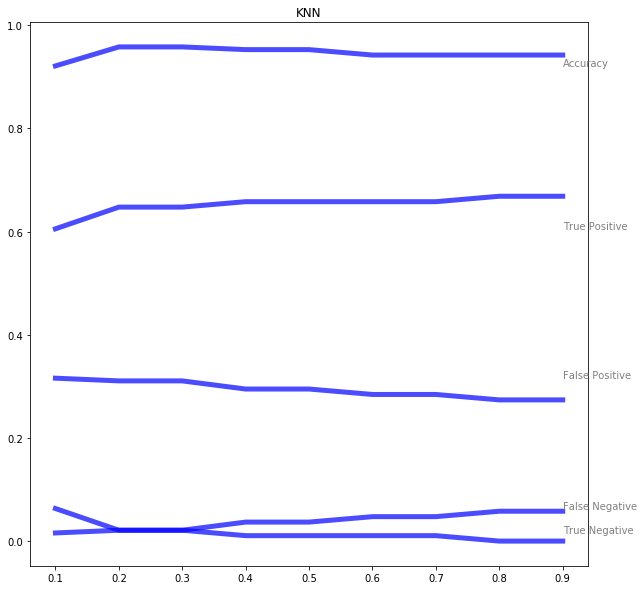

In [120]:
#KNN
#Scaling the data
scaler = MinMaxScaler()
scaler.fit(wis)
scaled_wis_data = pd.DataFrame(scaler.transform(wis),columns=list(wis))

n = 5
p = 1

X=scaled_wis_data[xcol]
y=scaled_wis_data['diagnosis1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=25)

wis_clf = KNeighborsClassifier(n_neighbors=n,p=p)
wis_clf.fit(X_train, y_train)

X1=X_test[xcol]
y1=y_test*1
yhat2 =pd.DataFrame(wis_clf.predict_proba(X1))


for i in range(1,10): 
    j=i/10
    fp=0
    fn=0
    x=0
    yhat1=(yhat2.iloc[:,1]> j )*1
    rmse1 = np.sqrt(np.mean((yhat1 - y1)**2))
    accuracy1=accuracy_score(yhat1,y1)
    precision1 = precision_score(yhat1, y1, average="macro")
    recall1 = recall_score(yhat1, y1, average="macro")
    
    TP = np.sum(np.logical_and(yhat1 == 1, y1 == 1))
    TN = np.sum(np.logical_and(yhat1 == 0, y1 == 0))
    FP = np.sum(np.logical_and(yhat1 == 1, y1 == 0))
    FN = np.sum(np.logical_and(yhat1 == 0, y1 == 1))
    result2.loc[i,'Model_type']= "KNN"
    result2.loc[i,'Cutoff']= j
    result2.loc[i,'RMSE']= rmse1
    result2.loc[i,'accuracy']= accuracy1
    result2.loc[i,'precision']= precision1
    result2.loc[i,'recall']= recall1
    result2.loc[i,'true_positive']= TP/len(yhat1)
    result2.loc[i,'false_positive']= FP/len(yhat1)
    result2.loc[i,'true_negative']= TN/len(yhat1)
    result2.loc[i,'false_negative']= FN/len(yhat1)

print(result2)

plt.figure(figsize=(10,10))
plt.title('KNN')

plt.plot(result2['Cutoff'], result2.iloc[:,3],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,3],"Accuracy", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,8],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,8],"True Positive", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,9],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,9],"True Negative", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,6],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,6],"False Positive", horizontalalignment='left', size='medium', color='grey')
plt.plot(result2['Cutoff'], result2.iloc[:,7],linewidth=5, alpha=0.7,color='b')
plt.text(.9, result2.iloc[0,7],"False Negative", horizontalalignment='left', size='medium', color='grey')



Similar to logistic regression, it has high accuracy, but True Negative is very low. Among the 3 models, logistic regression is slighlty better than KNN and Naive Bayes is the worst model.